In [217]:
# data mining
from matplotlib import pyplot as plt
import numpy as np
import os
from itertools import cycle

# Folder Path
path = "."
os.chdir(path)

# Labels
labels = ["0.7", "1.4", "2.8"]
# Colors
cycol = cycle('bgrcmk')

In [218]:
lines =[]

def read_text_file(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
        return lines

In [219]:


def one_plot():
    timesteps = []
    pressures = []

    for file in os.listdir():
        if file.endswith(".txt"):
            file_path = f"{path}/{file}"
            lines = read_text_file(file_path)
            for line in lines:
                tokens = line.split(",")
                token = tokens[4].split("\n")[0]
                timesteps.append(tokens[0])
                pressures.append(token)
            print(pressures)
            plt.plot(timesteps, pressures, next(cycol))
            timesteps.clear()
            pressures.clear()
    return timesteps, pressures


In [220]:
def subplots(x, y):
    timesteps = []
    pressures = []
    indexes = []

    for i in range(x):
        for j in range(y):
            indexes.append([i, j])
    figure, axis = plt.subplots(x, y)
    figure.tight_layout(h_pad=2)
    n = 0

    for file in os.listdir():
        if file.endswith(".txt"):
            file_path = f"{path}/{file}"
            lines = read_text_file(file_path)
            for line in lines:
                tokens = line.split(",")
                token = tokens[4].split("\n")[0]
                timesteps.append(tokens[0])
                token = token.split('.')[0]+"."+token.split('.')[1][0:4]
                pressures.append(float(token))

            t = np.array(timesteps)
            p = np.array(pressures)

            k=25
            xticks=t[::k]


            axis[indexes[n][0], indexes[n][1]]
            axis[indexes[n][0], indexes[n][1]].plot(t, p)
            axis[indexes[n][0], indexes[n][1]].set_title(str(file))
            #plt.plot(timesteps, pressures, next(cycol))
            timesteps.clear()
            pressures.clear()

            n+=1
            if n == len(indexes):
                break

    plt.setp(axis[-1, :], xlabel='time[]')
    plt.setp(axis[:, 0], ylabel='pressure[kT/A^3]')
    plt.savefig('plt.pdf')
    plt.show()

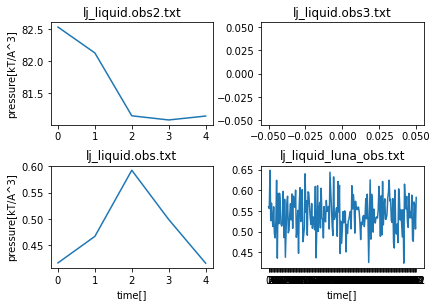

In [221]:

subplots(2,2)